## Load Dataset from HuggingFace

In [2]:
from datasets import load_dataset, load_from_disk

In [3]:
dataset = load_dataset("go_emotions", "raw")
dataset.save_to_disk("emotion_dataset")

Extracting data files:   0%|          | 0/3 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/211225 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/211225 [00:00<?, ? examples/s]

In [6]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize, RegexpTokenizer
import nltk
import re

In [6]:
dataset = load_from_disk("emotion_dataset")

for split, data in dataset.items():
    data.to_csv(f"go-emotion-{split}.csv", index = None)

Creating CSV from Arrow format:   0%|          | 0/212 [00:00<?, ?ba/s]

In [2]:
import pandas as pd
import numpy as np

<Axes: xlabel='example_very_unclear'>

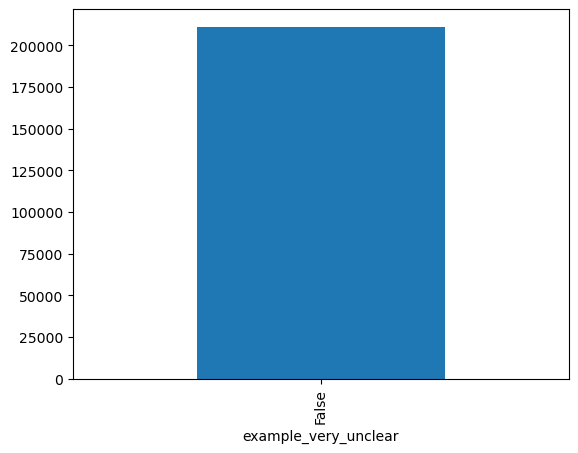

In [3]:
df = pd.read_csv("go-emotion-train.csv")

df["example_very_unclear"].value_counts().plot.bar(x="label", y="count")

In [27]:
df.columns

Index(['text', 'id', 'author', 'subreddit', 'link_id', 'parent_id',
       'created_utc', 'rater_id', 'example_very_unclear', 'admiration',
       'amusement', 'anger', 'annoyance', 'approval', 'caring', 'confusion',
       'curiosity', 'desire', 'disappointment', 'disapproval', 'disgust',
       'embarrassment', 'excitement', 'fear', 'gratitude', 'grief', 'joy',
       'love', 'nervousness', 'optimism', 'pride', 'realization', 'relief',
       'remorse', 'sadness', 'surprise', 'neutral'],
      dtype='object')

In [28]:
df.dtypes

text                     object
id                       object
author                   object
subreddit                object
link_id                  object
parent_id                object
created_utc             float64
rater_id                  int64
example_very_unclear       bool
admiration                int64
amusement                 int64
anger                     int64
annoyance                 int64
approval                  int64
caring                    int64
confusion                 int64
curiosity                 int64
desire                    int64
disappointment            int64
disapproval               int64
disgust                   int64
embarrassment             int64
excitement                int64
fear                      int64
gratitude                 int64
grief                     int64
joy                       int64
love                      int64
nervousness               int64
optimism                  int64
pride                     int64
realizat

In [4]:
df.drop(columns=["id", "author", "subreddit", "link_id", "parent_id", "created_utc", "rater_id", "example_very_unclear"], axis=1, inplace=True)

df.head(100)

,text,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,desire,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
0,That game hurt.,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,>sexuality shouldn’t be a grouping category I...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"You do right, if you don't care then fuck 'em!",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,Man I love reddit.,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,"[NAME] was nowhere near them, he was by the Fa...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,What? The claim is 2018 best shooters. Not ove...,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
96,"That's professor [NAME] to you, savage!",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
97,Let go or you will be dragged,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
98,No we're getting Kinsler and be happy with it,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
df.columns

Index(['text', 'admiration', 'amusement', 'anger', 'annoyance', 'approval',
       'caring', 'confusion', 'curiosity', 'desire', 'disappointment',
       'disapproval', 'disgust', 'embarrassment', 'excitement', 'fear',
       'gratitude', 'grief', 'joy', 'love', 'nervousness', 'optimism', 'pride',
       'realization', 'relief', 'remorse', 'sadness', 'surprise', 'neutral'],
      dtype='object')

## Clean Dataset

In [32]:
stop_words = stopwords.words("english")
lemmatizer = WordNetLemmatizer()

def preprocess(texts):
    output = []
    for text in texts:
        tokenized_text = word_tokenize(text.lower())
        # print(tokenized_text)
        tokenized_text = [t.strip() for t in tokenized_text if t not in stop_words and t.isalnum() and t != "NAME"]
        
        output += [" ".join(lemmatizer.lemmatize(str(x)) for x in tokenized_text)]
    
    return output

print(df["text"][1])
print(preprocess([df["text"][1], df["text"][96]]))

sexuality grouping category It make different othet ppl imo fit definition grouping
['sexuality grouping category make different othet ppl imo fit definition grouping', 'professor savage']


## Split Dataset

In [190]:
from sklearn.model_selection import cross_validate, train_test_split

X = df["text"]
y = df[['admiration', 'amusement', 'anger', 'annoyance', 'approval',
       'caring', 'confusion', 'curiosity', 'desire', 'disappointment',
       'disapproval', 'disgust', 'embarrassment', 'excitement', 'fear',
       'gratitude', 'grief', 'joy', 'love', 'nervousness', 'optimism', 'pride',
       'realization', 'relief', 'remorse', 'sadness', 'surprise', 'neutral']]

X_train, X_test, y_train, y_test = train_test_split(X.astype(str).to_numpy(), y.to_numpy(), test_size=0.2, random_state=42, shuffle=True)

print(f"train size: {len(X_train)}\ttest size: {len(X_test)}")
print(y_train)

train size: 168980	test size: 42245
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 1]]


## WordCloud Plotting

In [33]:
clean_df = df
clean_df["text"] = preprocess(clean_df["text"])

clean_df.head(100)

,text,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,desire,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
0,game hurt,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,sexuality grouping category make different oth...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,right care fuck,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,man love reddit,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,nowhere near falcon,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,claim 2018 best shooter overall best shooter,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
96,professor savage,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
97,let go dragged,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
98,getting kinsler happy,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt

891422


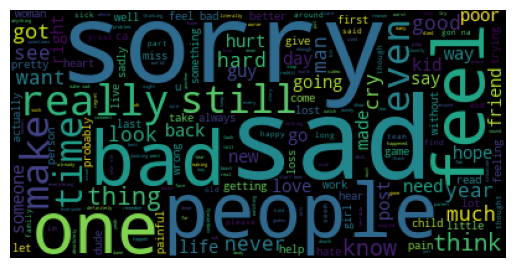

In [34]:
sad_text = "".join(x for x in clean_df["text"].where(clean_df["sadness"] == 1).astype(str))
print(len(sad_text))
sad_wc = WordCloud().generate_from_text(sad_text)

plt.imshow(sad_wc)
plt.axis("off")
plt.show()

920392


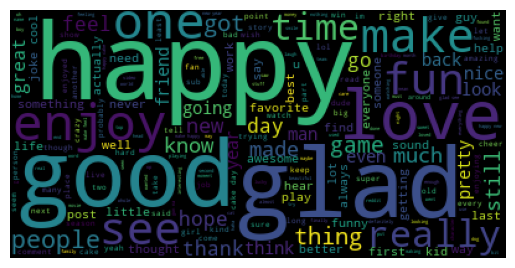

In [35]:
joy_text = "".join(x for x in clean_df["text"].where(clean_df["joy"] == 1).astype(str))
print(len(joy_text))
joy_wc = WordCloud().generate_from_text(joy_text)

plt.imshow(joy_wc)
plt.axis("off")
plt.show()

914020


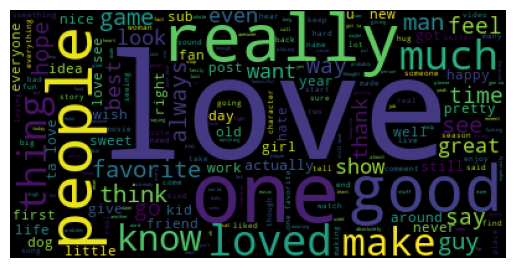

In [36]:
love_text = "".join(x for x in clean_df["text"].where(clean_df["love"] == 1).astype(str))
print(len(love_text))
love_wc = WordCloud().generate_from_text(love_text)

plt.imshow(love_wc)
plt.axis("off")
plt.show()

925743


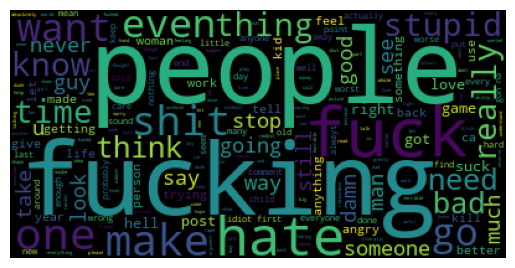

In [37]:
anger_text = "".join(x for x in clean_df["text"].where(clean_df["anger"] == 1).astype(str))
print(len(anger_text))
anger_wc = WordCloud().generate_from_text(anger_text)

plt.imshow(anger_wc)
plt.axis("off")
plt.show()

826061


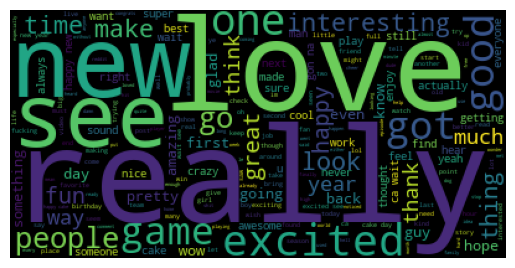

In [38]:
excitement_text = "".join(x for x in clean_df["text"].where(clean_df["excitement"] == 1).astype(str))
print(len(excitement_text))
excitement_wc = WordCloud().generate_from_text(excitement_text)

plt.imshow(excitement_wc)
plt.axis("off")
plt.show()

762075


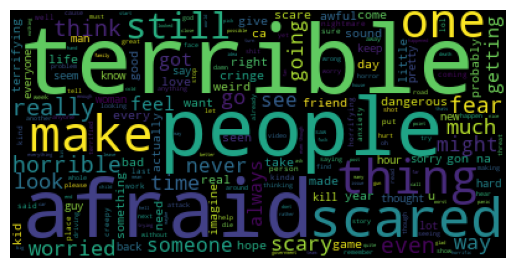

In [39]:
fear_text = "".join(x for x in clean_df["text"].where(clean_df["fear"] == 1).astype(str))
print(len(fear_text))
fear_wc = WordCloud().generate_from_text(fear_text)

plt.imshow(fear_wc)
plt.axis("off")
plt.show()

916178


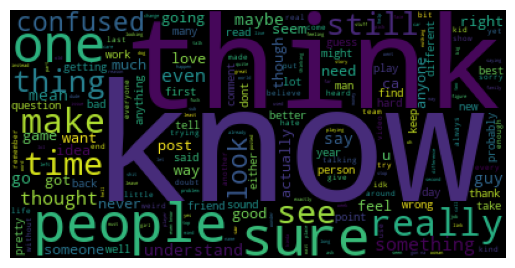

In [40]:
confusion_text = "".join(x for x in clean_df["text"].where(clean_df["confusion"] == 1).astype(str))
print(len(confusion_text))
confusion_wc = WordCloud().generate_from_text(confusion_text)

plt.imshow(confusion_wc)
plt.axis("off")
plt.show()

866996


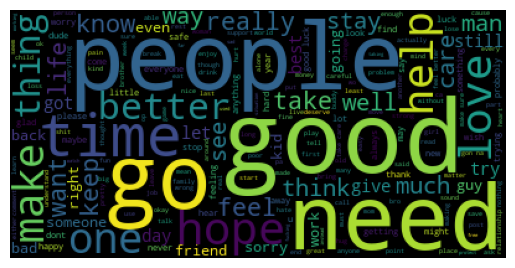

In [41]:
caring_text = "".join(x for x in clean_df["text"].where(clean_df["caring"] == 1).astype(str))
print(len(caring_text))
caring_wc = WordCloud().generate_from_text(caring_text)

plt.imshow(caring_wc)
plt.axis("off")
plt.show()

## Create Model

In [199]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_validate, LearningCurveDisplay, GridSearchCV
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score, ConfusionMatrixDisplay, hamming_loss
from sklearn.multioutput import MultiOutputClassifier, ClassifierChain
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

### Logistic Regression

In [60]:
lr_model = LogisticRegression(max_iter=1000)

In [61]:
lr_pipeline = Pipeline([("preprocess", FunctionTransformer(preprocess)), ("vectorizer", CountVectorizer()), ("clf", MultiOutputClassifier(lr_model))])

lr_pipeline

Pipeline(steps=[('preprocess',
                 FunctionTransformer(func=<function preprocess at 0x7f739bca00e0>)),
                ('vectorizer', CountVectorizer()),
                ('clf',
                 MultiOutputClassifier(estimator=LogisticRegression(max_iter=1000)))])

In [51]:
%%time

cv_result = cross_validate(
    lr_pipeline, X_train, y_train, cv=5, 
    scoring=["accuracy", "f1_macro", "recall_macro", "precision_macro"], 
    n_jobs=10, return_train_score=True)

cv_result

CPU times: user 429 ms, sys: 103 ms, total: 532 ms
Wall time: 57.4 s


{'fit_time': array([45.57015038, 45.09887147, 45.60040474, 45.1660347 , 45.23548007]),
 'score_time': array([2.21708274, 2.22861791, 2.21914411, 2.25524926, 2.25719833]),
 'test_accuracy': array([0.16194224, 0.16667653, 0.16797846, 0.16333294, 0.1631554 ]),
 'train_accuracy': array([0.22212688, 0.22433128, 0.22438306, 0.22453841, 0.2237247 ]),
 'test_f1_macro': array([0.21148224, 0.21027992, 0.20826054, 0.20758011, 0.21005475]),
 'train_f1_macro': array([0.28340093, 0.2844822 , 0.28574309, 0.28265413, 0.28444243]),
 'test_recall_macro': array([0.15287372, 0.15237891, 0.15058587, 0.15017915, 0.15120482]),
 'train_recall_macro': array([0.20020499, 0.20079551, 0.20165339, 0.20014597, 0.20111774]),
 'test_precision_macro': array([0.49663642, 0.49351616, 0.48122726, 0.49020656, 0.48478542]),
 'train_precision_macro': array([0.73707429, 0.7354676 , 0.74135064, 0.73550132, 0.73607849])}

In [52]:
print(f"test accuracy: {cv_result['test_accuracy'].mean()}\t\ttrain accuracy: {cv_result['train_accuracy'].mean()}\t\tdifference{cv_result['test_accuracy'].mean() - cv_result['train_accuracy'].mean()}")
print(f"test f1 macro: {cv_result['test_f1_macro'].mean()}\t\ttrain f1 macro: {cv_result['train_f1_macro'].mean()}\t\tdifference{cv_result['test_f1_macro'].mean() - cv_result['train_f1_macro'].mean()}")
print(f"test recall macro: {cv_result['test_recall_macro'].mean()}\t\ttrain recall macro: {cv_result['train_recall_macro'].mean()}\t\tdifference{cv_result['test_recall_macro'].mean() - cv_result['train_recall_macro'].mean()}")
print(f"test precision macro: {cv_result['test_precision_macro'].mean()}\ttrain precision macro: {cv_result['train_precision_macro'].mean()}\tdifference{cv_result['test_precision_macro'].mean() - cv_result['train_precision_macro'].mean()}")

test accuracy: 0.16461711445141436		train accuracy: 0.2238208663747189		difference-0.05920375192330454
test f1 macro: 0.20953151271102405		train f1 macro: 0.2841445574986201		difference-0.07461304478759606
test recall macro: 0.1514444950120865		train recall macro: 0.20078351950476594		difference-0.049339024492679434
test precision macro: 0.48927436515618855	train precision macro: 0.737094467764934	difference-0.24782010260874549


### Fine tune Logistic Regression

In [62]:
%%time

params = {
    "clf__estimator__solver": ["newton-cg", "sag", "saga"],
}

grid_search = GridSearchCV(estimator=lr_pipeline, param_grid=params, cv=5, return_train_score=True, n_jobs=10, verbose=3)
fine_tuned_clf = grid_search.fit(X_train, y_train)

fine_tuned_clf

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 5/5] END clf__estimator__solver=sag;, score=(train=0.224, test=0.163) total time= 3.3min
[CV 4/5] END clf__estimator__solver=sag;, score=(train=0.225, test=0.163) total time= 3.3min
[CV 3/5] END clf__estimator__solver=sag;, score=(train=0.224, test=0.168) total time= 3.4min
CPU times: user 2min 29s, sys: 500 ms, total: 2min 30s
Wall time: 9min


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess',
                                        FunctionTransformer(func=<function preprocess at 0x7f739bca00e0>)),
                                       ('vectorizer', CountVectorizer()),
                                       ('clf',
                                        MultiOutputClassifier(estimator=LogisticRegression(max_iter=1000)))]),
             n_jobs=10,
             param_grid={'clf__estimator__solver': ['newton-cg', 'sag',
                                                    'saga']},
             return_train_score=True, verbose=3)

[CV 2/5] END clf__estimator__solver=sag;, score=(train=0.224, test=0.167) total time= 4.1min
[CV 1/5] END clf__estimator__solver=sag;, score=(train=0.222, test=0.162) total time= 4.1min
[CV 4/5] END clf__estimator__solver=newton-cg;, score=(train=0.225, test=0.163) total time=  52.6s
[CV 3/5] END clf__estimator__solver=saga;, score=(train=0.225, test=0.168) total time= 4.7min
[CV 5/5] END clf__estimator__solver=newton-cg;, score=(train=0.224, test=0.163) total time=  52.2s
[CV 2/5] END clf__estimator__solver=saga;, score=(train=0.224, test=0.167) total time= 4.9min
[CV 3/5] END clf__estimator__solver=newton-cg;, score=(train=0.224, test=0.168) total time=  52.3s
[CV 1/5] END clf__estimator__solver=saga;, score=(train=0.222, test=0.162) total time= 5.0min
[CV 2/5] END clf__estimator__solver=newton-cg;, score=(train=0.224, test=0.167) total time= 1.2min
[CV 4/5] END clf__estimator__solver=saga;, score=(train=0.225, test=0.163) total time= 4.8min
[CV 1/5] END clf__estimator__solver=newton

In [121]:
fine_tuned_clf.cv_results_

{'mean_fit_time': array([ 57.62738404, 216.65070014, 289.99444337]),
 'std_fit_time': array([ 9.34682501, 20.61814998,  5.16553647]),
 'mean_score_time': array([2.94350567, 2.22664394, 2.05447936]),
 'std_score_time': array([0.76393387, 0.02460354, 0.05021503]),
 'param_clf__estimator__solver': masked_array(data=['newton-cg', 'sag', 'saga'],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'clf__estimator__solver': 'newton-cg'},
  {'clf__estimator__solver': 'sag'},
  {'clf__estimator__solver': 'saga'}],
 'split0_test_score': array([0.16194224, 0.16200142, 0.16211978]),
 'split1_test_score': array([0.16664694, 0.16673571, 0.16685407]),
 'split2_test_score': array([0.16797846, 0.16791928, 0.16821517]),
 'split3_test_score': array([0.16336253, 0.16336253, 0.16342171]),
 'split4_test_score': array([0.16318499, 0.16318499, 0.16348089]),
 'mean_test_score': array([0.16462303, 0.16464079, 0.16481832]),
 'std_test_score': array([0.00228

In [158]:
%%time

params = {
    "clf__estimator__C": [0, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5],
}

grid_search = GridSearchCV(estimator=fine_tuned_clf.best_estimator_, param_grid=params, cv=5, return_train_score=True, n_jobs=10, verbose=2)
fine_tuned_clf = grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


/opt/conda/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
5 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.11/site-packages/sklearn/base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/conda/lib/python3.11/site-packages/sklearn/pipeline.py", line 420, in fit
    self._final_estimator.fit(Xt, y, **fit_

[CV] END ................................clf__estimator__C=0; total time=   9.5s
[CV] END .............................clf__estimator__C=0.05; total time= 3.0min
[CV] END ..............................clf__estimator__C=0.2; total time= 3.1min
[CV] END ..............................clf__estimator__C=0.4; total time= 3.6min
CPU times: user 1min 33s, sys: 828 ms, total: 1min 34s
Wall time: 15min 34s


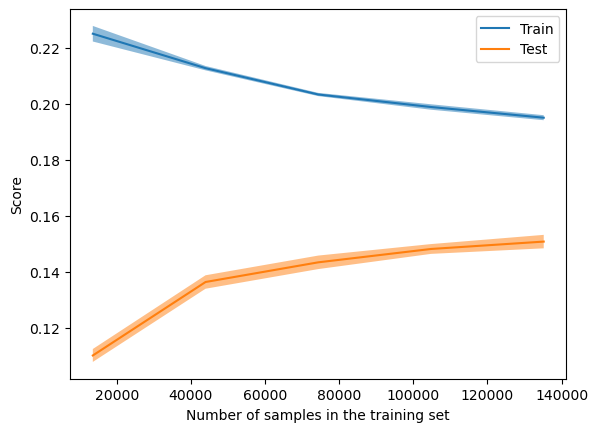

CPU times: user 2.6 s, sys: 1.31 s, total: 3.92 s
Wall time: 6min 42s


In [159]:
%%time

LearningCurveDisplay.from_estimator(fine_tuned_clf.best_estimator_, X_train, y_train, n_jobs=10)

plt.show()

In [160]:
best_estimator = fine_tuned_clf.best_estimator_
best_estimator.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 FunctionTransformer(func=<function preprocess at 0x7f739bca00e0>)),
                ('vectorizer', CountVectorizer()),
                ('clf',
                 MultiOutputClassifier(estimator=LogisticRegression(C=0.5,
                                                                    max_iter=1000,
                                                                    solver='saga')))])

In [161]:
fine_tuned_clf.cv_results_

{'mean_fit_time': array([ 12.26610355, 204.44615116, 197.02618752, 186.51937099,
        246.76197338, 203.18816013, 249.360886  , 224.5605608 ]),
 'std_fit_time': array([ 3.42336223, 35.57423095, 28.44051775,  1.83886523, 32.16553277,
         4.68069805, 26.54944324,  5.08522891]),
 'mean_score_time': array([0.        , 2.79768577, 2.83553662, 2.23432708, 3.38580785,
        2.2280086 , 2.21926227, 2.12560711]),
 'std_score_time': array([0.        , 0.75186398, 0.71388627, 0.02708684, 0.60664767,
        0.01793578, 0.04176261, 0.03134172]),
 'param_clf__estimator__C': masked_array(data=[0, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'clf__estimator__C': 0},
  {'clf__estimator__C': 0.01},
  {'clf__estimator__C': 0.05},
  {'clf__estimator__C': 0.1},
  {'clf__estimator__C': 0.2},
  {'clf__estimator__C': 0.3},
  {'clf__estimator__C': 0.4},
  {'clf__esti

## Save LR Model

In [162]:
import dill
dill.settings['recurse'] = True

In [163]:
with open('./lr_v1.0.joblib','wb') as io:
    dill.dump(best_estimator ,io)

In [164]:
lr_model = None
with open('./lr_v1.0.joblib','rb') as io:
    lr_model=dill.load(io)

lr_model

Pipeline(steps=[('preprocess',
                 FunctionTransformer(func=<function preprocess at 0x7f73fed2fce0>)),
                ('vectorizer', CountVectorizer()),
                ('clf',
                 MultiOutputClassifier(estimator=LogisticRegression(C=0.5,
                                                                    max_iter=1000,
                                                                    solver='saga')))])

In [165]:
y_pred = lr_model.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Macro F1 score: {f1_score(y_test, y_pred, average='macro')}")
print(f"Macro Recall score: {recall_score(y_test, y_pred, average='macro')}")
print(f"Macro Precision score: {precision_score(y_test, y_pred, average='macro')}")
print(f"Micro F1 score: {f1_score(y_test, y_pred, average='micro')}")
print(f"Micro Recall score: {recall_score(y_test, y_pred, average='micro')}")
print(f"Micro Precision score: {precision_score(y_test, y_pred, average='micro')}")
print(f"Hamming loss: {hamming_loss(y_test, y_pred)}")

Accuracy: 0.153698662563617
Macro F1 score: 0.19803909950400536
Macro Recall score: 0.14192170682711627
Macro Precision score: 0.5299290541850777
Micro F1 score: 0.26704527626996327
Micro Recall score: 0.1708452937752173
Micro Precision score: 0.6112028725314184
Hamming loss: 0.03949748913649967


In [169]:
print(f"text: {X_test[10]}\ntruth: {y_test[10]}")
print(y_pred[10])

text: Okay gotcha Does wife lot stress anxiety job general
truth: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


AttributeError: 'Pipeline' object has no attribute 'clf'

## Classifier Chain

In [191]:
lr_chain_pipeline = Pipeline([("preprocess", FunctionTransformer(preprocess)), ("vectorizer", CountVectorizer()), ("clf", ClassifierChain(LogisticRegression(max_iter=1000), order="random", random_state=42, cv=5, verbose=2))])

# X = clean_df["text"]
# y = clean_df[['admiration', 'amusement', 'anger', 'annoyance', 'approval',
#        'caring', 'confusion', 'curiosity', 'desire', 'disappointment',
#        'disapproval', 'disgust', 'embarrassment', 'excitement', 'fear',
#        'gratitude', 'grief', 'joy', 'love', 'nervousness', 'optimism', 'pride',
#        'realization', 'relief', 'remorse', 'sadness', 'surprise', 'neutral']]

# X_train, X_test, y_train, y_test = train_test_split(X.astype(str).to_numpy(), y.to_numpy(), test_size=0.2, random_state=42, shuffle=True)

# count_vectorizer = CountVectorizer()

# X_count = count_vectorizer.fit_transform(preprocess(X_train))

# for i in range (10):
#     lr_chain_pipeline[2][i].fit(X_count, y_train)

lr_chain_pipeline.fit(X_train, y_train)

/opt/conda/lib/python3.11/site-packages/sklearn/utils/_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(


[Chain] .................. (1 of 28) Processing order 9, total=   2.2s
[Chain] ................. (2 of 28) Processing order 25, total=   1.6s
[Chain] .................. (3 of 28) Processing order 8, total=   1.7s
[Chain] ................. (4 of 28) Processing order 21, total=   1.1s
[Chain] .................. (5 of 28) Processing order 0, total=   2.4s
[Chain] ................. (6 of 28) Processing order 12, total=   1.3s
[Chain] ................. (7 of 28) Processing order 17, total=   1.8s
[Chain] ................. (8 of 28) Processing order 22, total=   2.1s
[Chain] ................. (9 of 28) Processing order 11, total=   1.7s
[Chain] ................ (10 of 28) Processing order 13, total=   1.8s
[Chain] ................ (11 of 28) Processing order 15, total=   1.7s
[Chain] ................. (12 of 28) Processing order 1, total=   2.2s
[Chain] ................. (13 of 28) Processing order 4, total=   2.5s
[Chain] ................. (14 of 28) Processing order 5, total=   1.7s
[Chain

Pipeline(steps=[('preprocess',
                 FunctionTransformer(func=<function preprocess at 0x7f739bca00e0>)),
                ('vectorizer', CountVectorizer()),
                ('clf',
                 ClassifierChain(base_estimator=LogisticRegression(max_iter=1000),
                                 cv=5, order='random', random_state=42,
                                 verbose=2))])

In [192]:
y_pred = lr_chain_pipeline.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred >= 0.5)}")
print(f"Macro F1 score: {f1_score(y_test, y_pred >= 0.5, average='macro')}")
print(f"Macro Recall score: {recall_score(y_test, y_pred >= 0.5, average='macro')}")
print(f"Macro Precision score: {precision_score(y_test, y_pred >= 0.5, average='macro')}")
print(f"Micro F1 score: {f1_score(y_test, y_pred >= 0.5, average='micro')}")
print(f"Micro Recall score: {recall_score(y_test, y_pred >= 0.5, average='micro')}")
print(f"Micro Precision score: {precision_score(y_test, y_pred >= 0.5, average='micro')}")
print(f"Hamming loss: {hamming_loss(y_test, y_pred >= 0.5)}")

Accuracy: 0.1694638418747781
Macro F1 score: 0.21360691928039882
Macro Recall score: 0.1546123009956378
Macro Precision score: 0.5095274739354855
Micro F1 score: 0.2850706283487579
Micro Recall score: 0.18796796274364172
Micro Precision score: 0.5897096794508471
Hamming loss: 0.03970715046582013
text: okay gotcha wife lot stress anxiety job general
truth: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


In [197]:
y_pred = lr_chain_pipeline.predict_proba(X_test)

print(f"text: {X_test[0]}\ntruth: {y_test[0]}")
print(y_pred[0])

text: literally everywhere nothing especially texan heard freaking sconsin
truth: [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0.01964352 0.03679417 0.01764284 0.15163557 0.0607836  0.00162273
 0.041047   0.03414684 0.00059533 0.11614153 0.12628015 0.00612817
 0.01038051 0.00947761 0.00328383 0.00780791 0.00190476 0.00515314
 0.00222495 0.00550086 0.06204906 0.00040187 0.01521678 0.0011145
 0.0018448  0.03035462 0.01861985 0.10420765]


In [203]:
with open('./lr_chain_v1.0.joblib','wb') as io:
    dill.dump(lr_chain_pipeline ,io)

In [223]:
model = None
with open('./lr_chain_v1.0.joblib','rb') as io:
    model=dill.load(io)

model

Pipeline(steps=[('preprocess',
                 FunctionTransformer(func=<function preprocess at 0x7f7399a0d3a0>)),
                ('vectorizer', CountVectorizer()),
                ('clf',
                 ClassifierChain(base_estimator=LogisticRegression(max_iter=1000),
                                 cv=5, order='random', random_state=42,
                                 verbose=2))])

## RF Chain Pipeline

In [200]:
rf_pipeline = Pipeline([("preprocess", FunctionTransformer(preprocess)), ("vectorizer", CountVectorizer()), ("clf", RandomForestClassifier(max_depth=3, n_jobs=5, criterion="entropy"))])

In [207]:
%%time

params = {
    "clf__criterion": ["gini"],
    "clf__n_estimators": [150],
    "clf__max_depth": [3, 4, 5, 6, 7]
}

grid_search = GridSearchCV(estimator=rf_pipeline, param_grid=params, cv=5, return_train_score=True, n_jobs=10, verbose=2)
fine_tuned_rf_clf = grid_search.fit(X_train, y_train)

fine_tuned_rf_clf

Fitting 5 folds for each of 5 candidates, totalling 25 fits
CPU times: user 1min 17s, sys: 7.82 s, total: 1min 25s
Wall time: 9min 47s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess',
                                        FunctionTransformer(func=<function preprocess at 0x7f739bca00e0>)),
                                       ('vectorizer', CountVectorizer()),
                                       ('clf',
                                        RandomForestClassifier(criterion='entropy',
                                                               max_depth=3,
                                                               n_jobs=5))]),
             n_jobs=10,
             param_grid={'clf__criterion': ['gini'],
                         'clf__max_depth': [3, 4, 5, 6, 7],
                         'clf__n_estimators': [150]},
             return_train_score=True, verbose=2)

In [211]:
fine_tuned_rf_clf.best_estimator_

Pipeline(steps=[('preprocess',
                 FunctionTransformer(func=<function preprocess at 0x7f739bca00e0>)),
                ('vectorizer', CountVectorizer()),
                ('clf',
                 RandomForestClassifier(max_depth=3, n_estimators=150,
                                        n_jobs=5))])

[CV] END clf__criterion=gini, clf__max_depth=3, clf__n_estimators=150; total time= 2.2min
[CV] END clf__criterion=gini, clf__max_depth=5, clf__n_estimators=150; total time= 2.0min
[CV] END clf__criterion=gini, clf__max_depth=7, clf__n_estimators=150; total time= 1.7min


In [213]:
fine_tuned_rf = fine_tuned_rf_clf.best_estimator_
fine_tuned_rf.fit(X_train, y_train)

[CV] END clf__criterion=gini, clf__max_depth=4, clf__n_estimators=150; total time= 2.3min
[CV] END clf__criterion=gini, clf__max_depth=5, clf__n_estimators=150; total time= 2.3min
[CV] END clf__criterion=gini, clf__max_depth=7, clf__n_estimators=150; total time= 1.2min
[CV] END clf__criterion=gini, clf__max_depth=4, clf__n_estimators=150; total time= 2.3min
[CV] END clf__criterion=gini, clf__max_depth=5, clf__n_estimators=150; total time= 2.3min
[CV] END clf__criterion=gini, clf__max_depth=7, clf__n_estimators=150; total time= 1.2min
[CV] END clf__criterion=gini, clf__max_depth=3, clf__n_estimators=150; total time= 2.3min
[CV] END clf__criterion=gini, clf__max_depth=5, clf__n_estimators=150; total time= 2.3min
[CV] END clf__criterion=gini, clf__max_depth=7, clf__n_estimators=150; total time= 1.3min
[CV] END clf__criterion=gini, clf__max_depth=3, clf__n_estimators=150; total time= 2.3min
[CV] END clf__criterion=gini, clf__max_depth=5, clf__n_estimators=150; total time= 2.3min
[CV] END c

Pipeline(steps=[('preprocess',
                 FunctionTransformer(func=<function preprocess at 0x7f739bca00e0>)),
                ('vectorizer', CountVectorizer()),
                ('clf',
                 RandomForestClassifier(max_depth=3, n_estimators=150,
                                        n_jobs=5))])

In [214]:
y_pred = fine_tuned_rf.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Macro F1 score: {f1_score(y_test, y_pred, average='macro')}")
print(f"Macro Recall score: {recall_score(y_test, y_pred, average='macro')}")
print(f"Macro Precision score: {precision_score(y_test, y_pred, average='macro')}")
print(f"Micro F1 score: {f1_score(y_test, y_pred, average='micro')}")
print(f"Micro Recall score: {recall_score(y_test, y_pred, average='micro')}")
print(f"Micro Precision score: {precision_score(y_test, y_pred, average='micro')}")
print(f"Hamming loss: {hamming_loss(y_test, y_pred)}")

Accuracy: 0.016333293880932655
Macro F1 score: 0.0
Macro Recall score: 0.0
Macro Precision score: 0.0
Micro F1 score: 0.0
Micro Recall score: 0.0
Micro Precision score: 0.0
Hamming loss: 0.04211571952724752


/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [216]:
y_pred = lr_chain_pipeline.predict_proba(X_test)

print(f"text: {X_test[0]}\ntruth: {y_test[0]}")
print(y_pred[0])

text: literally everywhere nothing especially texan heard freaking sconsin
truth: [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0.01964352 0.03679417 0.01764284 0.15163557 0.0607836  0.00162273
 0.041047   0.03414684 0.00059533 0.11614153 0.12628015 0.00612817
 0.01038051 0.00947761 0.00328383 0.00780791 0.00190476 0.00515314
 0.00222495 0.00550086 0.06204906 0.00040187 0.01521678 0.0011145
 0.0018448  0.03035462 0.01861985 0.10420765]


In [215]:
with open('./rf_v1.0.joblib','wb') as io:
    dill.dump(fine_tuned_rf_clf.best_estimator_ ,io)

## RF with classifier chain

In [219]:
rf_chain_pipeline = Pipeline([("preprocess", FunctionTransformer(preprocess)), ("vectorizer", CountVectorizer()), ("clf", ClassifierChain(RandomForestClassifier(max_depth=3, n_estimators=150), order="random", random_state=42, cv=5, verbose=2))])

rf_chain_pipeline.fit(X_train, y_train)

/opt/conda/lib/python3.11/site-packages/sklearn/utils/_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(


[Chain] .................. (1 of 28) Processing order 9, total=   2.4s
[Chain] ................. (2 of 28) Processing order 25, total=   2.0s
[Chain] .................. (3 of 28) Processing order 8, total=   2.1s
[Chain] ................. (4 of 28) Processing order 21, total=   2.1s
[Chain] .................. (5 of 28) Processing order 0, total=   2.0s
[Chain] ................. (6 of 28) Processing order 12, total=   2.4s
[Chain] ................. (7 of 28) Processing order 17, total=   2.1s
[Chain] ................. (8 of 28) Processing order 22, total=   2.2s
[Chain] ................. (9 of 28) Processing order 11, total=   2.2s
[Chain] ................ (10 of 28) Processing order 13, total=   2.2s
[Chain] ................ (11 of 28) Processing order 15, total=   2.0s
[Chain] ................. (12 of 28) Processing order 1, total=   2.2s
[Chain] ................. (13 of 28) Processing order 4, total=   2.2s
[Chain] ................. (14 of 28) Processing order 5, total=   2.2s
[Chain

Pipeline(steps=[('preprocess',
                 FunctionTransformer(func=<function preprocess at 0x7f739bca00e0>)),
                ('vectorizer', CountVectorizer()),
                ('clf',
                 ClassifierChain(base_estimator=RandomForestClassifier(max_depth=3,
                                                                       n_estimators=150),
                                 cv=5, order='random', random_state=42,
                                 verbose=2))])

In [220]:
y_pred = rf_chain_pipeline.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Macro F1 score: {f1_score(y_test, y_pred, average='macro')}")
print(f"Macro Recall score: {recall_score(y_test, y_pred, average='macro')}")
print(f"Macro Precision score: {precision_score(y_test, y_pred, average='macro')}")
print(f"Micro F1 score: {f1_score(y_test, y_pred, average='micro')}")
print(f"Micro Recall score: {recall_score(y_test, y_pred, average='micro')}")
print(f"Micro Precision score: {precision_score(y_taccest, y_pred, average='micro')}")
print(f"Hamming loss: {hamming_loss(y_test, y_pred)}")

Accuracy: 0.016333293880932655
Macro F1 score: 0.0
Macro Recall score: 0.0
Macro Precision score: 0.0


/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Micro F1 score: 0.0
Micro Recall score: 0.0
Micro Precision score: 0.0
Hamming loss: 0.04211571952724752


In [222]:
y_pred = rf_chain_pipeline.predict_proba(X_test)
y_discrete_pred = rf_chain_pipeline.predict(X_test)

print(f"text: {X_test[0]}\ntruth: {y_test[0]}")
print(y_pred[0])
print(y_discrete_pred[0])

text: literally everywhere nothing especially texan heard freaking sconsin
truth: [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0.07972679 0.0428235  0.03767497 0.06483791 0.08359783 0.02833756
 0.03467432 0.04568738 0.0178339  0.040063   0.0538585  0.02467829
 0.01151981 0.02647365 0.01503987 0.05384959 0.00353117 0.03726609
 0.03776937 0.00870903 0.04037217 0.00609454 0.04157223 0.00599966
 0.01166845 0.03189482 0.026721   0.26262587]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
